In [14]:
#data analysis
import numpy as np
import pandas as pd
import random as rnd

#for  visualization
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# loading the data
titrain = pd.read_csv("D:/Kaggle/titanic/train.csv")
titest = pd.read_csv("D:/Kaggle/titanic/test.csv")

In [15]:
#Combining a large training set
combine=[titrain, titest]

#look at the columns in the table
print(" Columns in the table")
print(titrain.columns.values)


 Columns in the table
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [16]:
#to look at the data type of the column
titrain.head(1).info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 12 columns):
PassengerId    1 non-null int64
Survived       1 non-null int64
Pclass         1 non-null int64
Name           1 non-null object
Sex            1 non-null object
Age            1 non-null float64
SibSp          1 non-null int64
Parch          1 non-null int64
Ticket         1 non-null object
Fare           1 non-null float64
Cabin          0 non-null object
Embarked       1 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 176.0+ bytes


In [17]:
#to find the total number of null values in each column
titrain.info()
print('-'*40)
titest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [18]:
#to look at the mean and std
print(titrain.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [22]:
titrain.describe(include = ['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Fortune, Mr. Mark",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


In [24]:
titrain[['Pclass','Survived']].groupby(['Pclass'], as_index= False).mean().sort_values(by='Survived', ascending= False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [25]:
titrain[['Sex','Survived']].groupby(['Sex'], as_index= False).mean().sort_values(by='Survived', ascending= False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [26]:
titrain[['SibSp','Survived']].groupby(['SibSp'], as_index= False).mean().sort_values(by='Survived', ascending= False)


,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [27]:
titrain[['Parch','Survived']].groupby(['Parch'], as_index= False).mean().sort_values(by='Survived', ascending= False)


,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


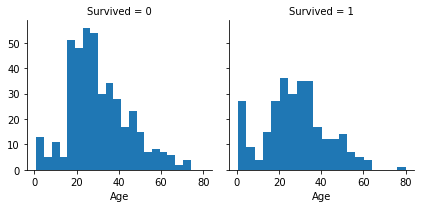

In [28]:
#figuring out the correlation of age and survival
g=sb.FacetGrid(titrain, col='Survived')
g.map(plt.hist,'Age',bins=20)


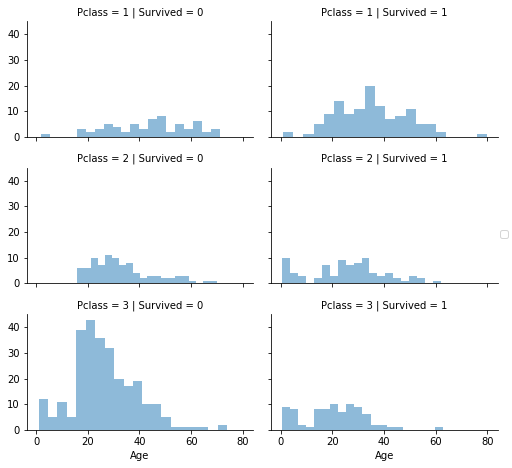

In [32]:
#figuring out the correlation of Pclass and survival
grid=sb.FacetGrid(titrain, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist,'Age',alpha=.5,bins=20)
grid.add_legend();

C:\Users\uthir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\uthir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


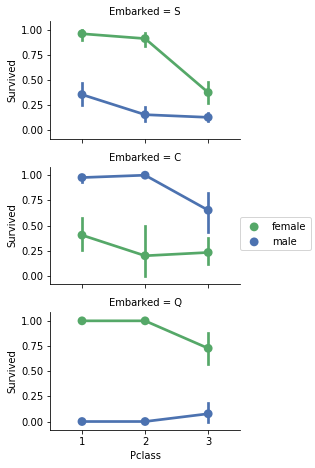

In [39]:
# correlating categorical value
grid=sb.FacetGrid(titrain,row='Embarked', size=2.2, aspect=1.6)
grid.map(sb.pointplot,'Pclass','Survived','Sex', palette='deep')
grid.add_legend();

C:\Users\uthir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


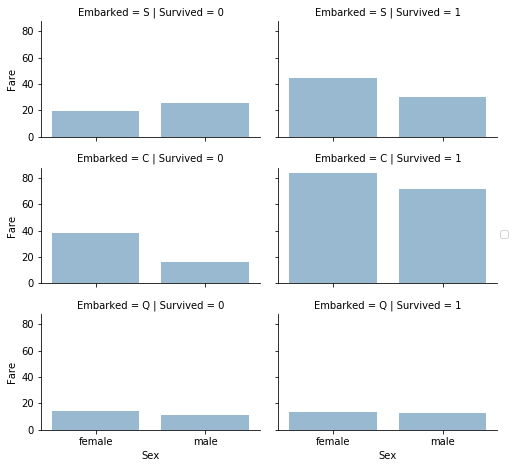

In [42]:
#correlating Embarked (Categorical non-numeric), 
#Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric).
grid = sb.FacetGrid(titrain, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sb.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

C:\Users\uthir\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


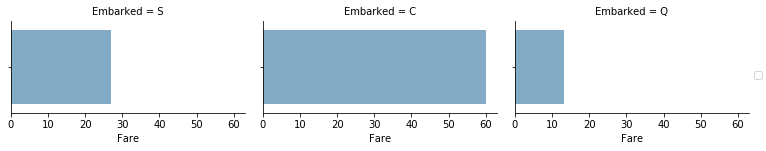

In [48]:
#figuring out the correlation of age and survival
g=sb.FacetGrid(titrain, col='Embarked', size=2.2, aspect=1.6)
g.map(sb.barplot,'Fare',alpha=.6, ci=None)
g.add_legend()

In [49]:
print("Before", titrain.shape, titest.shape, combine[0].shape, combine[1].shape)

titrain = titrain.drop(['Ticket', 'Cabin'], axis=1)
titest = titest.drop(['Ticket', 'Cabin'], axis=1)
combine = [titrain, titest]

print("After", titrain.shape, titest.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 10) (418, 9)


In [51]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titrain['Title'], titrain['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [52]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
titrain[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [53]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

titrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [54]:
titrain = titrain.drop(['Name', 'PassengerId'], axis=1)
titest = titest.drop(['Name'], axis=1)
combine = [titrain, titest]
titrain.shape, titest.shape

((891, 9), (418, 9))

In [55]:
for dataset in combine:
    dataset['Sex']= dataset['Sex'].map({'female':1, 'male':0}).astype(int)
titrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


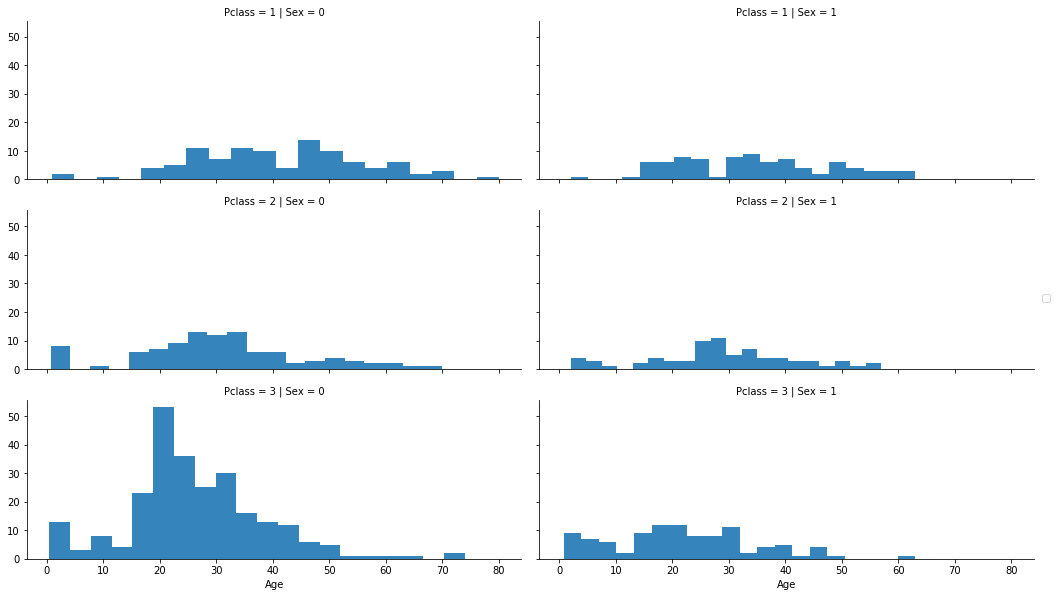

In [62]:
#looking for co realtion btw pclass and sex to determine age
grid=sb.FacetGrid(titrain, row='Pclass', col='Sex', size=2.8, aspect=2.6)
grid.map(plt.hist,'Age', alpha=0.9, bins=20)
grid.add_legend()


In [63]:
guess_ages=np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [64]:
for i in range(0,2):
    print(i)

0
1


In [66]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df=dataset[(dataset['Sex']==i) & (dataset['Pclass']==j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            guess_ages[i,j]=int(age_guess/0.5+0.5)*0.5
guess_ages    

array([[42., 28., 24.],
       [41., 24., 22.]])

In [68]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            dataset.loc[(dataset.Age.isnull())& (dataset.Sex == i) & (dataset.Pclass == j+1),'Age']= guess_ages[i,j]
    dataset['Age']=dataset['Age'].astype(int)
titrain.head() 
    

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [69]:
titrain['AgeBrand']=pd.cut(titrain['Age'],5)


In [71]:
titrain[['AgeBrand','Survived']].groupby(['AgeBrand'], as_index= False).mean().sort_values(by='AgeBrand',ascending=True)

,AgeBrand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [72]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
titrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBrand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [73]:
titrain=titrain.drop(['AgeBrand'],axis=1)
combine=[titrain, titest]
titrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [75]:
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
titrain[['FamilySize','Survived']].groupby(['FamilySize'], as_index= False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [78]:
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1, 'IsAlone']=1
titrain[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [79]:
titrain=titrain.drop(['Parch','SibSp','FamilySize'],axis=1)
titest=titest.drop(['Parch','SibSp','FamilySize'], axis=1)
combine=[titrain, titest]
titrain.head()


,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [81]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

titrain.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


In [82]:
frq_port=titrain.Embarked.dropna().mode()[0]
frq_port

'S'

In [86]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(frq_port)

In [154]:
titrain[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,0,0.339009
1,1,0.553571
2,2,0.389610


In [156]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
   

In [163]:
titrain.isnull().values.sum()

0

In [165]:
titrain[['Embarked','Survived']].groupby(['Embarked'],as_index=False).mean()

,Embarked,Survived
0,0,0.339009
1,1,0.553571
2,2,0.389610


In [119]:
train = pd.read_csv("D:/Kaggle/titanic/train.csv")

In [160]:
titrain['Embarked']=train['Embarked']


In [147]:
frq_port

0    S
dtype: object

In [162]:
titrain['Embarked'] = titrain['Embarked'].fillna((titrain['Embarked']).mode()[0])

In [169]:
titest['Embarked'] = titest['Embarked'].fillna('S')

In [166]:
test = pd.read_csv("D:/Kaggle/titanic/test.csv")

In [171]:
titest['Embarked'] = titest['Embarked'].fillna((titest['Embarked']).mode()[0])

In [175]:
titest['Embarked'] = titest['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )

In [176]:
titrain['Embarked']=titrain['Embarked'].astype(int)

In [177]:
titest['Embarked']=titest['Embarked'].astype(int)

In [178]:
titrain['Fare'].fillna(titrain['Fare'].dropna().median(), inplace=True)
titrain.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [180]:
titrain['FareBand'] = pd.qcut(titrain['Fare'], 4)
titrain[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [183]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3

In [182]:
titrain['Fare'].isnull().values.sum()

0

In [184]:
titrain['Fare']=titrain['Fare'].astype(int)

In [189]:
titest['Fare']=titest['Fare'].astype(int)

In [188]:
titest['Fare'].isnull().values.sum()

0

In [187]:
titest['Fare'].fillna(titest['Fare'].dropna().median(), inplace=True)


In [190]:
titrain = titrain.drop(['FareBand'], axis=1)
combine = [titrain, titest]
    
titrain.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,0,1,3,0,2
2,1,3,1,1,0,0,2,1,3
3,1,1,1,2,0,0,3,0,2
4,0,3,0,2,0,0,1,1,6
5,0,3,0,1,0,2,1,1,3
6,0,1,0,3,0,0,1,1,3
7,0,3,0,0,0,0,4,0,0
8,1,3,1,1,0,0,3,0,3
9,1,2,1,0,0,1,3,0,0


In [191]:
titest.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,0,2,1,1,6
3,895,3,0,1,0,0,1,1,3
4,896,3,1,1,0,0,3,0,3
5,897,3,0,0,0,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,0,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,0,0,1,0,3


In [192]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [194]:
y_train=titrain["Survived"]
x_train=titrain.drop("Survived",axis=1)
x_test=titest.drop("PassengerId", axis=1).copy()
x_train.shape, y_train.shape, x_test.shape

((891, 8), (891,), (418, 8))

In [195]:
#logistic Regression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)
acc_log=round(logreg.score(x_train,y_train)*100,2)
acc_log

80.36

In [197]:
coeff=pd.DataFrame(titrain.columns.delete(0))
coeff.columns=['Feature']
coeff['Correlation']=pd.Series(logreg.coef_[0])
coeff.sort_values(by='Correlation',ascending=False)

,Feature,Correlation
1,Sex,2.199198
5,Title,0.389811
2,Age,0.275644
4,Embarked,0.271167
6,IsAlone,0.210186
3,Fare,0.000000
7,Age*Class,-0.300404
0,Pclass,-0.705445


In [198]:
#Support Vector Machine
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
acc_svc=round(svc.score(x_train,y_train)*100,2)
acc_svc

82.38

In [201]:
#K-Nearest Neighbor
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
acc_knn=round(knn.score(x_train, y_train)*100,2)
acc_knn

81.93

In [202]:
# Gaussian Naive Bayes
gaussian=GaussianNB()
gaussian.fit(x_train,y_train)
y_pred=gaussian.predict(x_test)
acc_gaussian=round(gaussian.score(x_train,y_train)*100,2)
acc_gaussian

72.17

In [203]:
#perceptron
perceptron=Perceptron()
perceptron.fit(x_train,y_train)
y_pred=perceptron.predict(x_test)
acc_perceptron=round(perceptron.score(x_train,y_train)*100,2)
acc_perceptron

C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


75.65

In [204]:
#Linear SVC
linear_svc=LinearSVC()
linear_svc.fit(x_train,y_train)
y_pred=linear_svc.predict(x_test)
acc_linear_svc=round(linear_svc.score(x_train,y_train)*100,2)
acc_linear_svc

78.79

In [206]:
#Stochastic Gradient Descent
sgd=SGDClassifier()
sgd.fit(x_train,y_train)
y_pred=sgd.predict(x_test)
acc_sgd=round(sgd.score(x_train,y_train)*100,2)
acc_sgd

C:\Users\uthir\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.11

In [207]:
#Decision Tree
decision_tree=DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
y_pred=decision_tree.predict(x_test)
acc_decision_tree=round(decision_tree.score(x_train,y_train)*100,2)
acc_decision_tree

84.29

In [208]:
#Random Forest
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train,y_train)
y_pred=random_forest.predict(x_test)
acc_random_forest=round(random_forest.score(x_train,y_train)*100,2)
acc_random_forest

84.29

In [209]:
#model evaluation
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,84.29
8,Decision Tree,84.29
0,Support Vector Machines,82.38
1,KNN,81.93
2,Logistic Regression,80.36
7,Linear SVC,78.79
6,Stochastic Gradient Decent,78.11
5,Perceptron,75.65
4,Naive Bayes,72.17


In [214]:
submission=pd.DataFrame({
    'PassengerId':titest["PassengerId"],
    'Survived' : y_pred
})
submission.to_csv("D:/Kaggle/titanic/submission.csv", index=False)